In [80]:
import __future__
# import gym
# from gym.wrappers import Monitor

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import gym
import gym_icegame 

import itertools
import numpy as np
import os
import random
import sys
import psutil
import tensorflow as tf

if "../" not in sys.path:
    sys.path.append("../")

from lib import plotting
from collections import deque, namedtuple

# env from: https://github.com/kvzhao/icegame
env = gym.make('IceGameEnv-v0')
VALID_ACTIONS = [0, 1, 2, 3, 4, 5, 6]

[2017-07-27 14:28:14,220] Making new env: IceGameEnv-v0



	+------------------------------------------------------------------------------------------------+
	|                                                                                                |
	|                                                                                                |
	|                                                                                                |
	|                                                                                                |
	|                                                                                                |
	|                                                                                                |
	|                                                                                                |
	|                                                                                                |
	|                                                                                                |

In [81]:
# env.start(1)
# # env.reset()
# print(list(env.sim.get_canvas_map())[:10])
# # print(list(env.sim.get_canvas_map()).index(1.0))
# print(set(list(env.sim.get_canvas_map())))
# env.step(0)
# print(list(env.sim.get_canvas_map())[:10])
# print(list(env.sim.get_canvas_map()).index(1.0))
# print(set(list(env.sim.get_canvas_map())))

# print(env.get_obs())

In [97]:
def show_images(images=None, cols = 1, titles = None):
#     config_map = env._transf2d(env.sim.get_state_t_map())
#     canvas_map = env._transf2d(env.sim.get_canvas_map())
#     energy_map = env._transf2d(env.sim.get_energy_map())
#     defect_map = env._transf2d(env.sim.get_defect_map())
#     map_list = [config_map, canvas_map, energy_map, defect_map]
    map_list = []
    for i in range(4):
        map_list.append(env.get_obs()[:,:,i])
    images = map_list
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
#         if image.ndim == 2:
#             plt.gray()
        plt.imshow(image, 'Blues', interpolation=None)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    
# show_images()

def GO(action):
    obs, reward, terminate, rets = env.step(action)
    print('action: {}, reward: {}, terminate: {}, action_dict: {}'.format(action, reward, terminate, rets))
    show_images()
    return terminate

def no_show_GO(action):
    obs, reward, terminate, rets = env.step(action)
#     print('reward: {}, terminate: {}, rets: {}'.format(reward, terminate, rets))
#     show_images()
    return terminate

def test_GO(action):
    if action == 6:
        env.sim.flip_trajectory()
        rets = env.sim.metropolis()
#         env.sim.update_config()
    else:
        rets = env.sim.draw(action)
    print('action: {}, rets: {}'.format(action, rets))
    show_images()
    return rets
    

In [98]:
# ## for test
# # NEED to comment print, show in GO()
# for start_point in range(1024):
#     env.reset()
#     env.start(start_point)
#     GO_list = [0,1,2,3]
# #     GO_list = [0,0,1,2,2,3,6]
#     for actioin in GO_list:
#         rets = env.sim.draw(actioin)
#         if(rets[1]==0.0 and rets[2]==0.0):        
#             enen = no_show_GO(6)
#             if enen == True:
#                 print(start_point)
#                 break
# #     print('now in: {}, enen: {}'.format(start_point, enen))

start


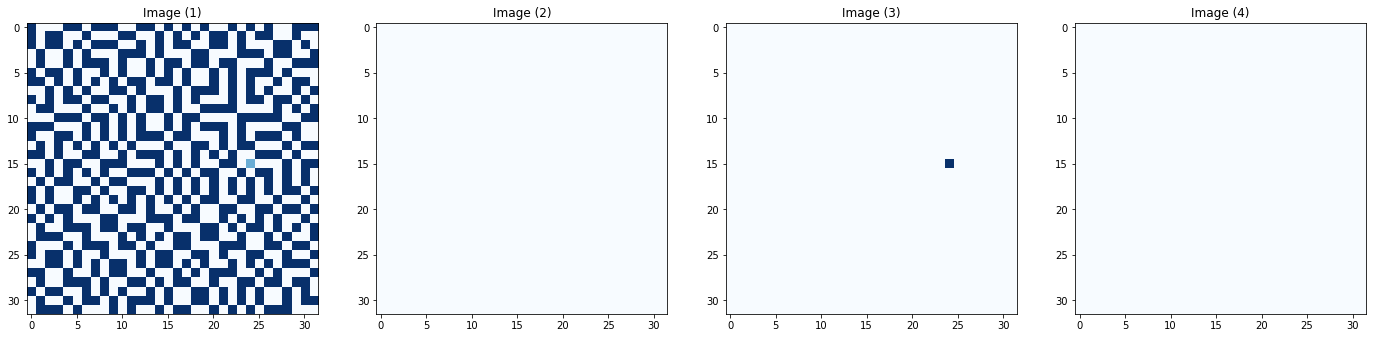

action: 0, rets: [1.0, 0.00390625, 0.001953125]


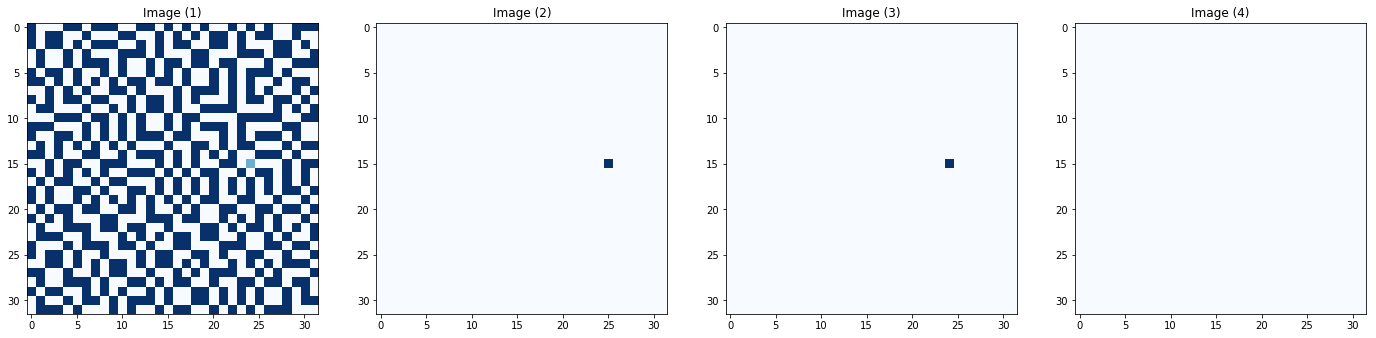

action: 1, rets: [1.0, 0.00390625, 0.0]


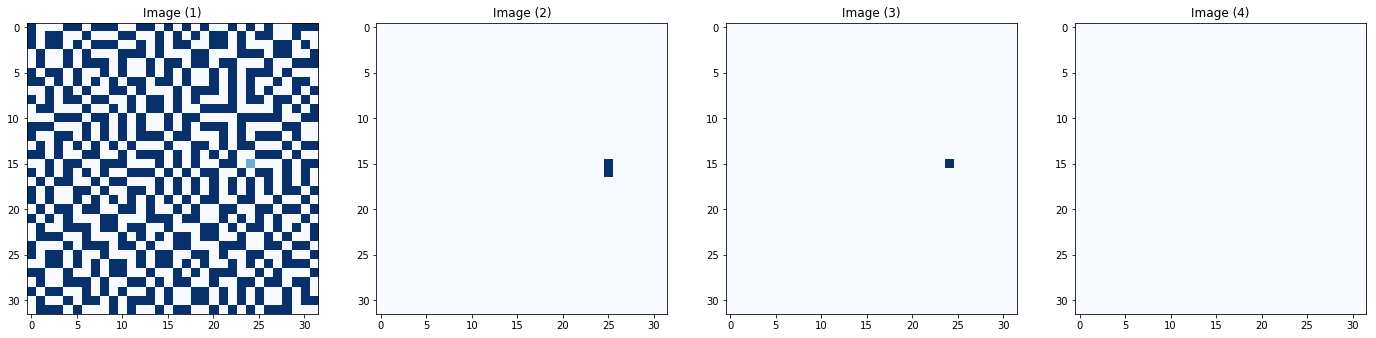

action: 2, rets: [1.0, 0.00390625, 0.001953125]


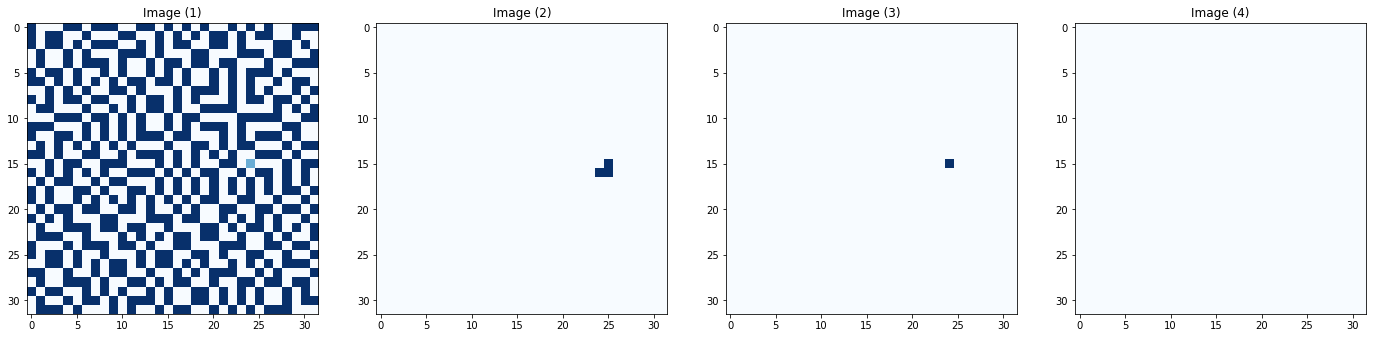

action: 3, rets: [1.0, 0.0, 0.0]


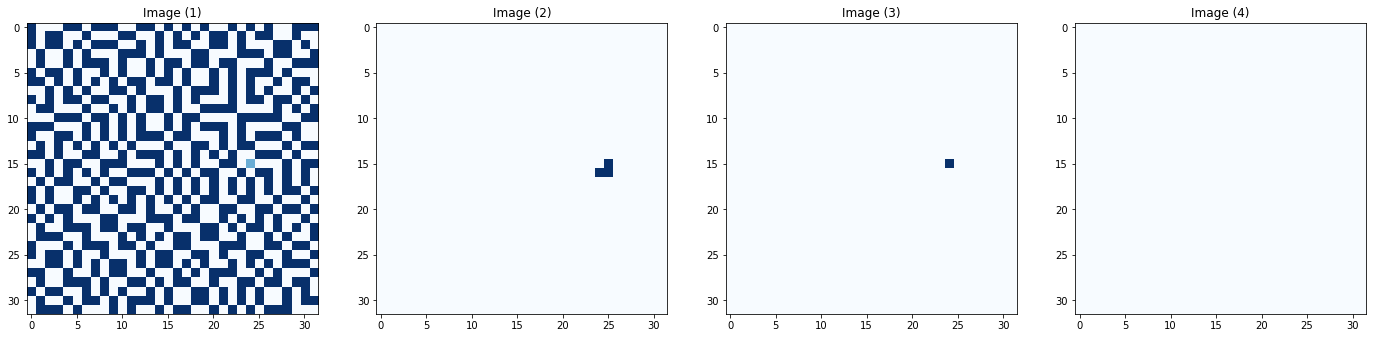

action: 6, rets: [-1.0, 0.00390625, 0.001953125, 0.0048828125]


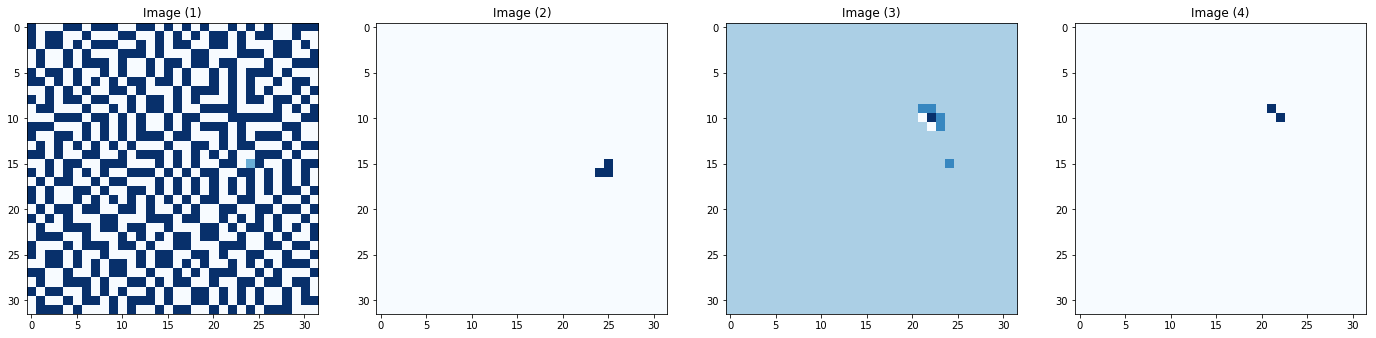

In [99]:
start_point = 504
env.reset()
env.start(start_point)
print 'start'
show_images()
GO_list = [0,1,2,3,6]
for action in GO_list:
#     enen = GO(action)
    ene = test_GO(action)


In [100]:
## ----------------------------- ##

start


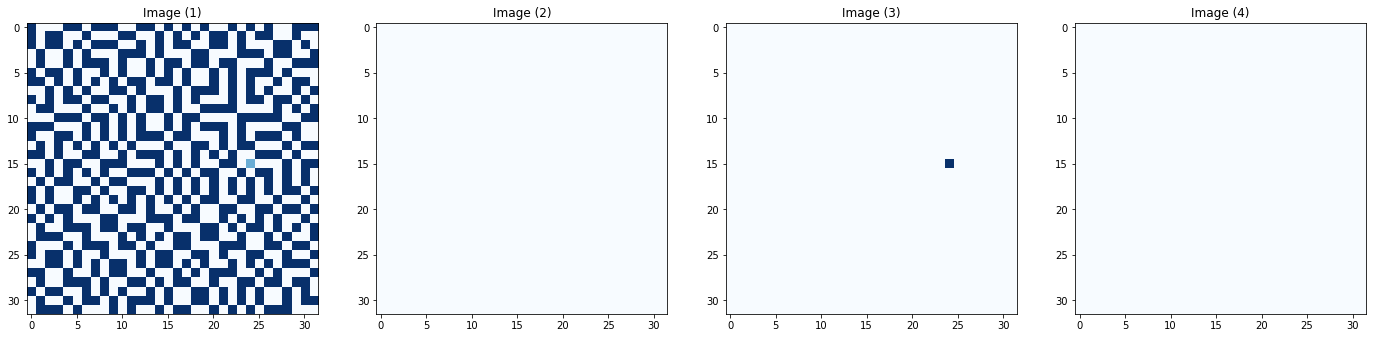

action: 0, rets: [1.0, 0.00390625, 0.001953125]


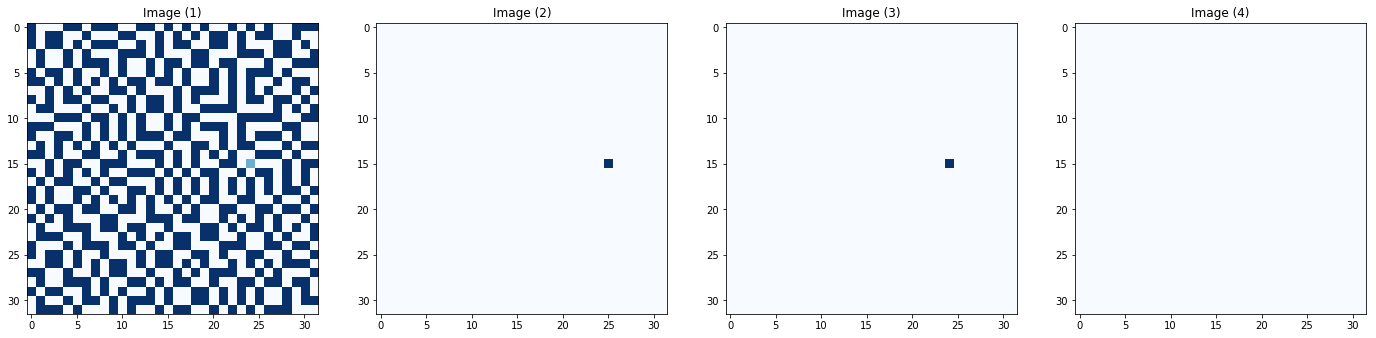

action: 1, rets: [1.0, 0.00390625, 0.0]


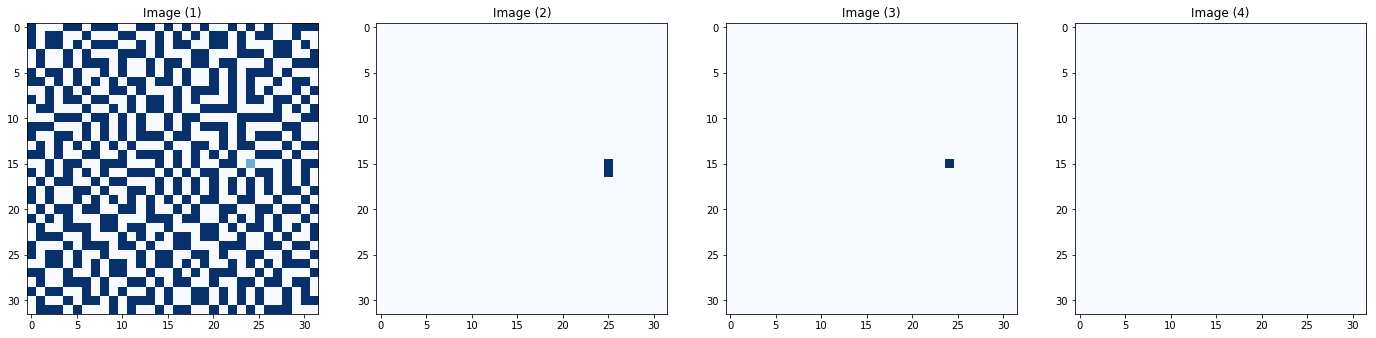

action: 2, rets: [1.0, 0.00390625, 0.001953125]


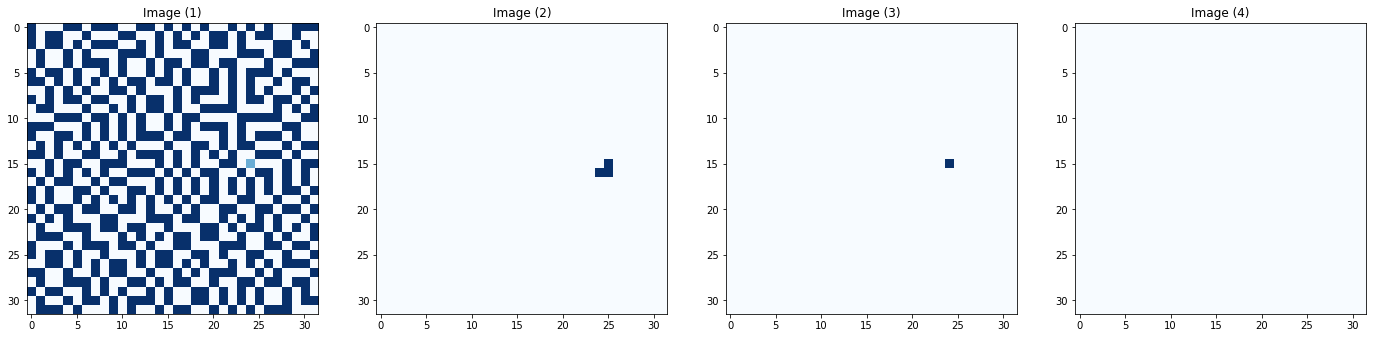

action: 3, rets: [1.0, 0.0, 0.0]


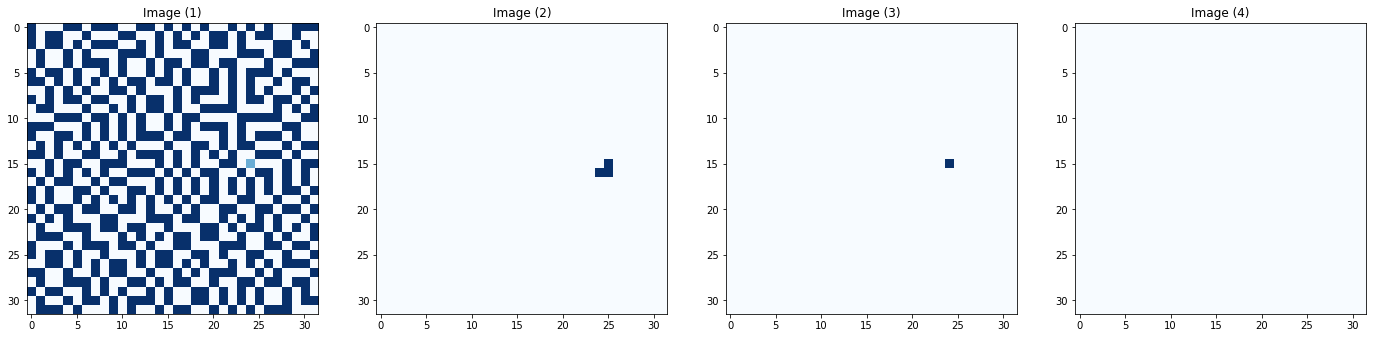

action: 4, rets: [-1.0, 0.00390625, 0.001953125]


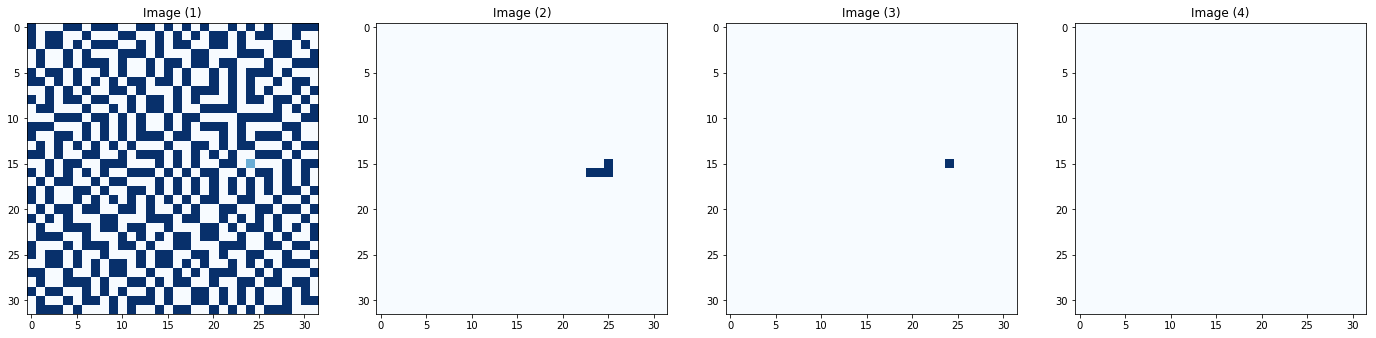

action: 5, rets: [-1.0, 0.00390625, 0.001953125]


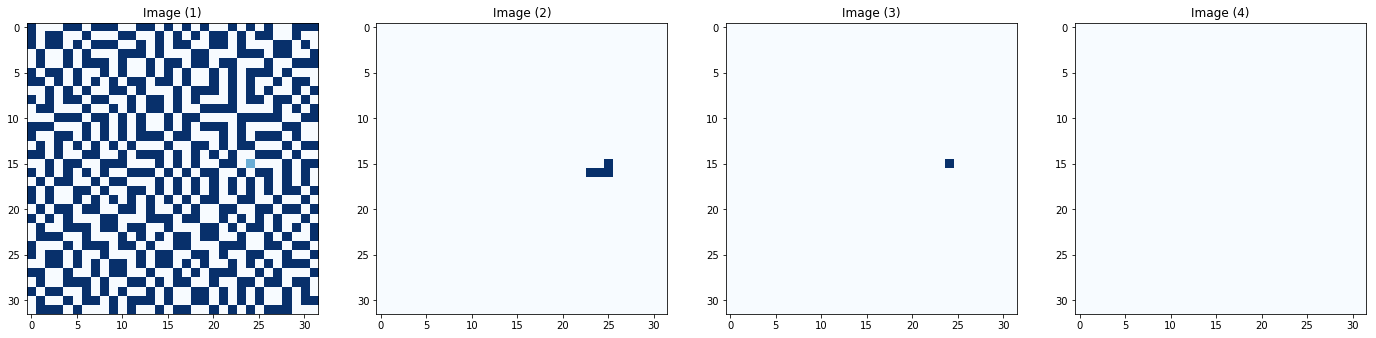

action: 6, rets: [-1.0, 0.0078125, 0.0, 0.005859375]


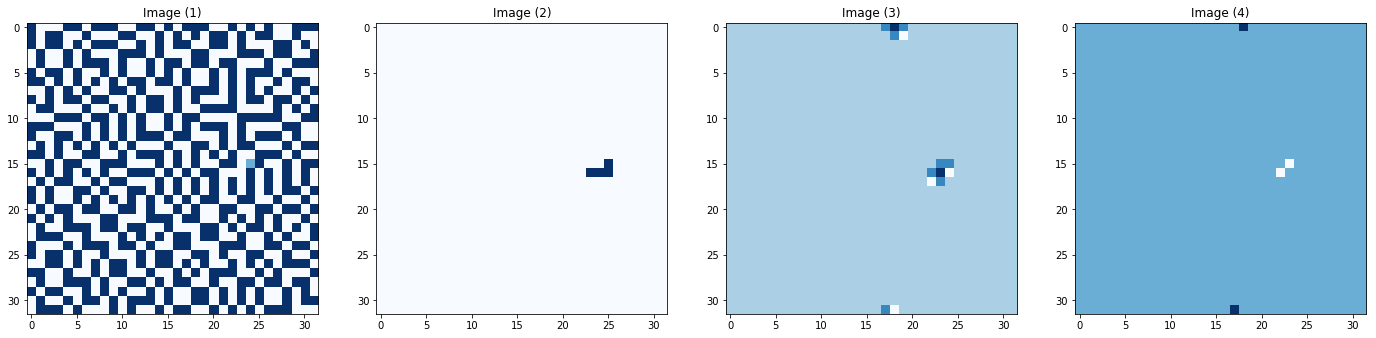

In [101]:
# start_point = 506
env.reset()
env.start(start_point)
print 'start'
show_images()
GO_list = [0,1,2,3,4,5,6]
for action in GO_list:
#     enen = GO(action)
    ene = test_GO(action)

In [102]:
## ----------------------------- ##

In [88]:
# 別往下

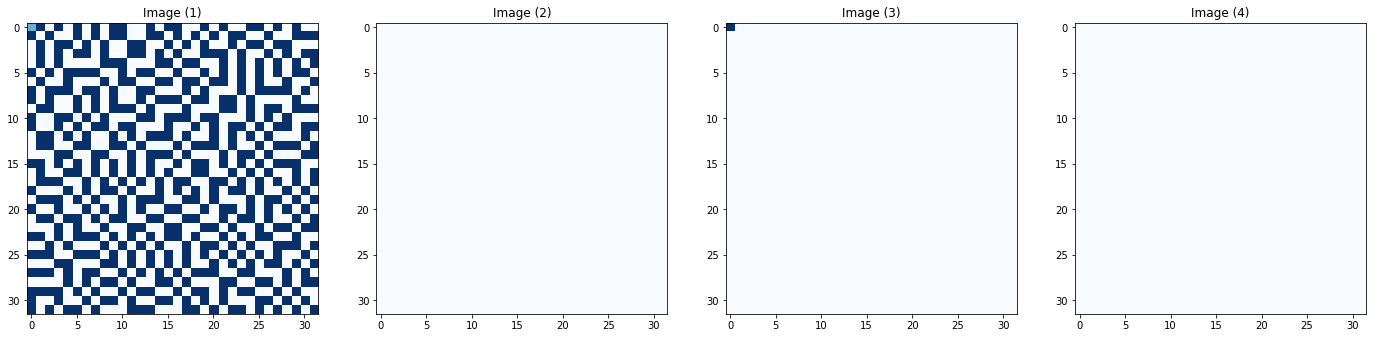

In [17]:
start_point = 0
env.reset()
env.start(start_point)
show_images()

In [18]:
GO_list = [0, 1, 2, 3]

reward: 0.5, terminate: False, rets: {0: 1}


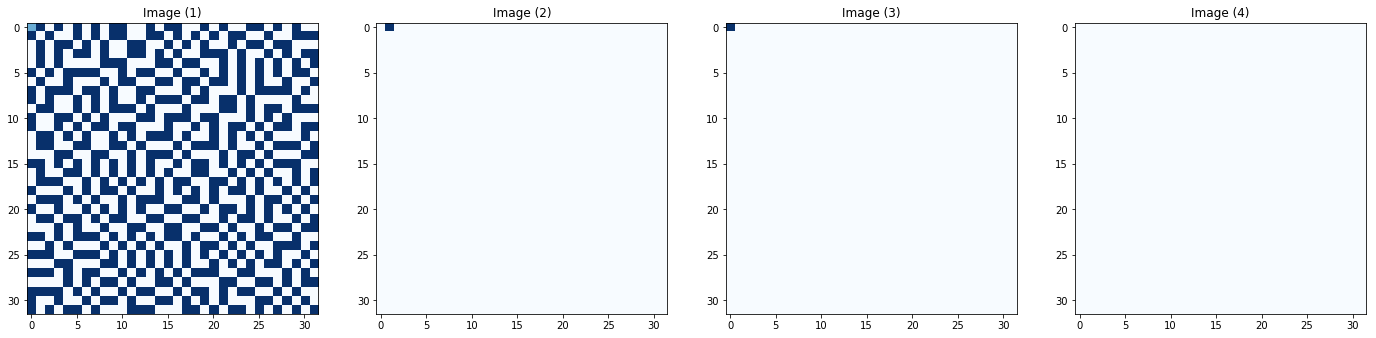

reward: 0.5, terminate: False, rets: {0: 1, 1: 1}


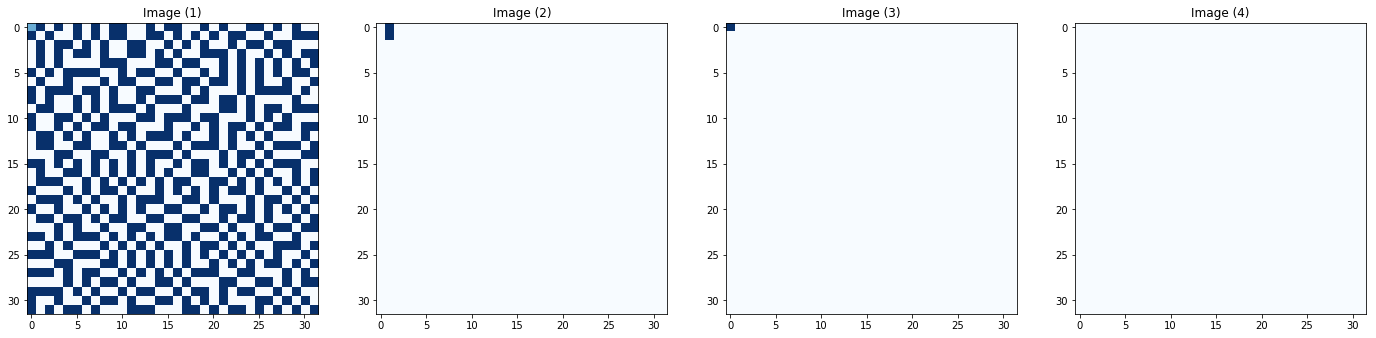

reward: 0.5, terminate: False, rets: {0: 1, 1: 1, 2: 1}


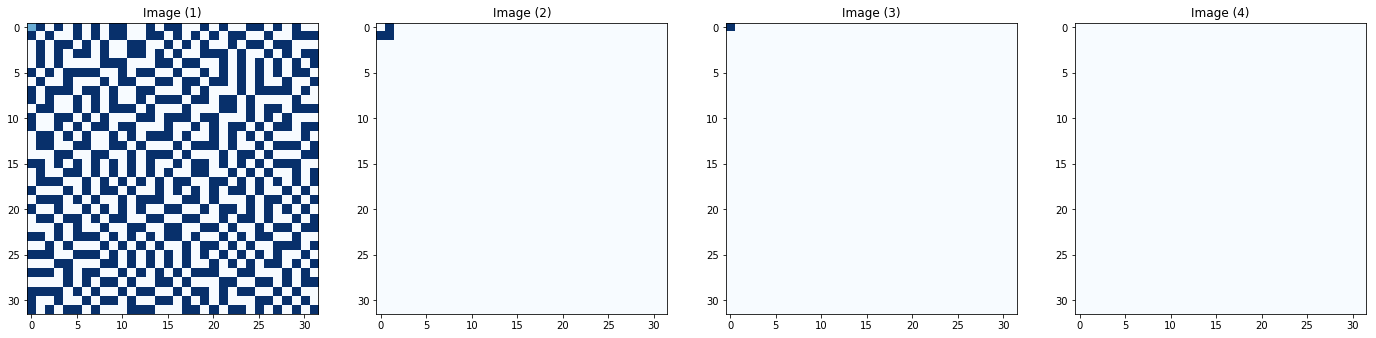

reward: 0.01, terminate: False, rets: {0: 1, 1: 1, 2: 1, 3: 1}


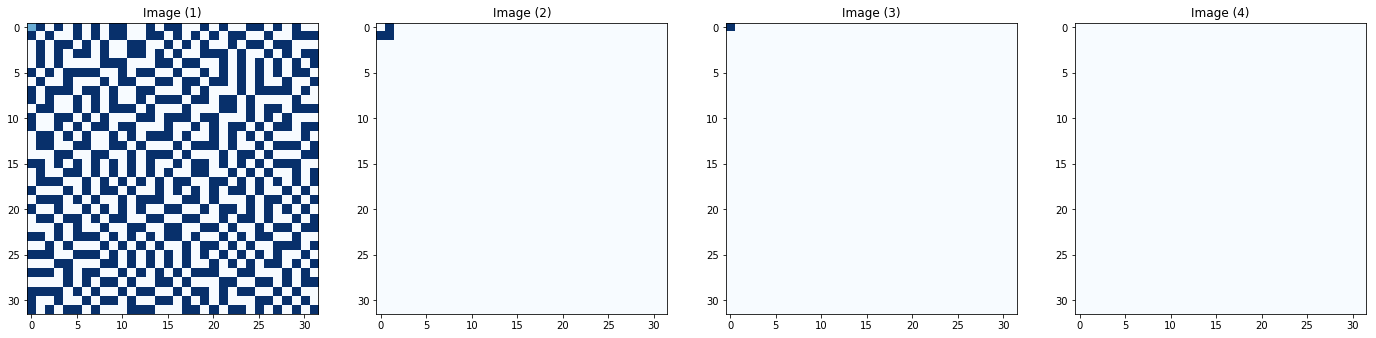

In [19]:
for actioin in GO_list:
    GO(actioin)

In [20]:
env.render()


	+------------------------------------------------------------------------------------------------+
	| x  *                                                                                           |
	| *  *                                                                                           |
	|                                                                                                |
	|                                                                                                |
	|                                                                                                |
	|                                                                                                |
	|                                                                                                |
	|                                                                                                |
	|                                                                                                |

In [21]:
## test rets
env.reset()
env.start(100)
obs, reward, terminate, rets = env.step_auto(0)
print(rets)
obs, reward, terminate, rets = env.step_auto(0)
print(rets)
obs, reward, terminate, rets = env.step_auto(0)
print(rets)

[1.0, 0.00390625, 0.001953125]
[-1.0, 0.01171875, 0.00390625]
[1.0, 0.01171875, 0.001953125]


In [22]:
rets = env.sim.draw(0)
print(rets)
env.sim.flip_trajectory()
rets = env.sim.metropolis()
print(rets)
rets = env.sim.draw(0)
print(rets)

[1.0, 0.01171875, 0.00390625]
[-1.0, 0.015625, 0.001953125, 0.0048828125]
[-1.0, -0.00390625, 0.001953125]


In [23]:
print(env.get_obs()[:,:,0])

[[-1.  1. -1. ...,  1. -1. -1.]
 [ 1. -1.  1. ...,  1.  1.  1.]
 [-1.  1. -1. ..., -1. -1. -1.]
 ..., 
 [ 1.  1.  1. ...,  1. -1. -1.]
 [ 1. -1. -1. ..., -1.  1. -1.]
 [ 1. -1.  1. ...,  1. -1.  1.]]


[[-0.33333334 -0.33333334 -0.33333334 ..., -0.33333334 -0.33333334
  -0.33333334]
 [-0.33333334 -0.33333334 -0.33333334 ..., -0.33333334 -0.33333334
  -0.33333334]
 [-0.33333334 -0.33333334 -0.33333334 ..., -0.33333334 -0.33333334
  -0.33333334]
 ..., 
 [-0.33333334 -0.33333334 -0.33333334 ..., -0.33333334 -0.33333334
  -0.33333334]
 [-0.33333334 -0.33333334 -0.33333334 ..., -0.33333334 -0.33333334
  -0.33333334]
 [-0.33333334 -0.33333334 -0.33333334 ..., -0.33333334 -0.33333334
  -0.33333334]]


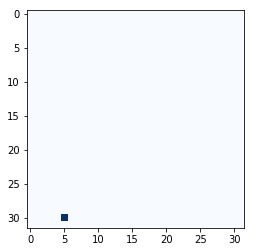

In [28]:
env.reset()

print(env.get_obs()[:,:,2])
plt.imshow(env.get_obs()[:,:,2], 'Blues')

[[-1.  1. -1. ...,  1. -1. -1.]
 [ 1. -1.  1. ...,  1.  1.  1.]
 [-1.  1. -1. ..., -1. -1. -1.]
 ..., 
 [ 1.  1.  1. ...,  1. -1. -1.]
 [ 1. -1. -1. ..., -1.  1. -1.]
 [ 1. -1.  1. ...,  1. -1.  1.]]


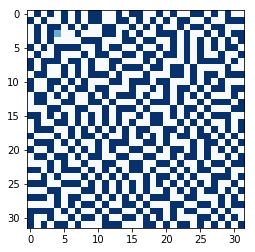

In [25]:
print(env.get_obs()[:,:,0])
plt.imshow(env.get_obs()[:,:,0], 'Blues')

In [26]:
a = np.array([[1,2], [3,4]])
b = np.array([[10,20], [30,40]])
t1 = np.stack([a, b], axis=2)
print(a)
print('\n')
print(b)
print('\n')
print(t1)

[[1 2]
 [3 4]]


[[10 20]
 [30 40]]


[[[ 1 10]
  [ 2 20]]

 [[ 3 30]
  [ 4 40]]]


In [27]:
t1[:,:,0]

array([[1, 2],
       [3, 4]])